In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('DataPreprocessing.csv')

In [3]:
data.head()

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes


In [4]:
data.shape

(10, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10 non-null     object 
 1   Age             9 non-null      float64
 2   Income          9 non-null      float64
 3   Online Shopper  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [6]:
data.isna().sum()

Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

In [7]:
data.dtypes

Region             object
Age               float64
Income            float64
Online Shopper     object
dtype: object

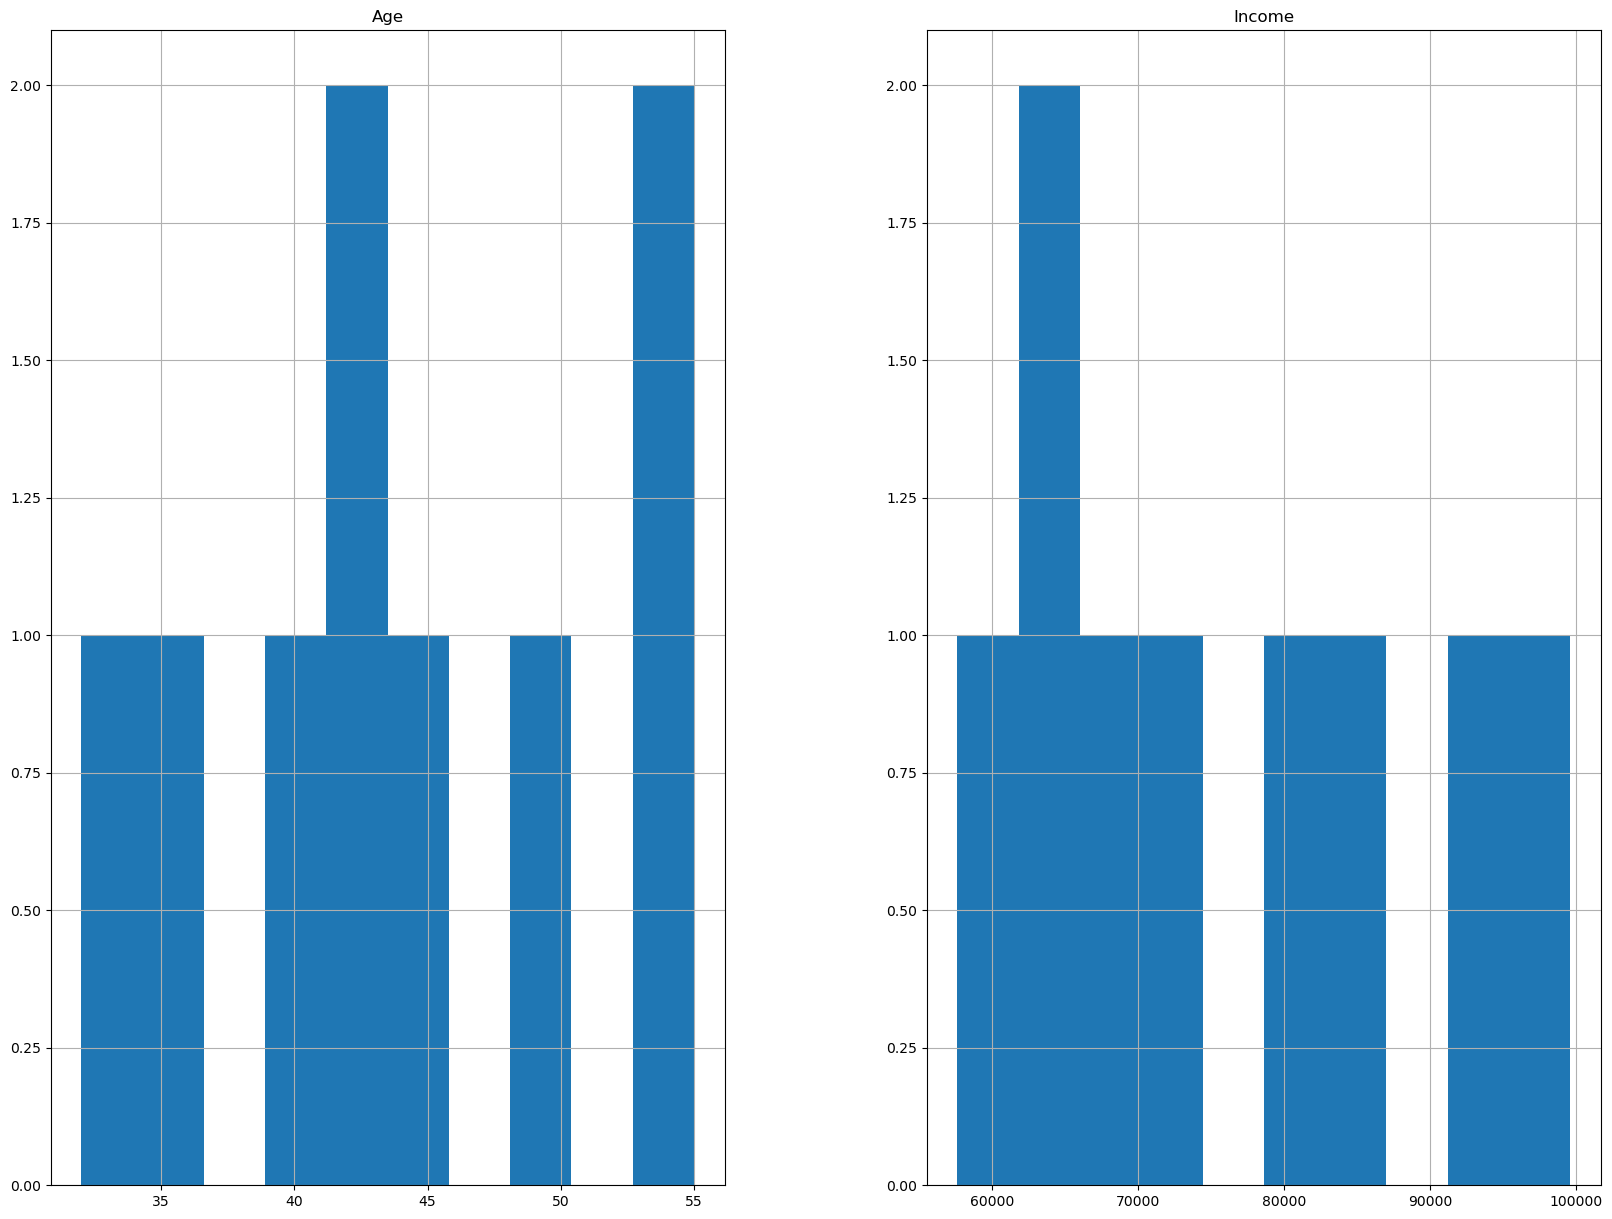

In [8]:
dgraph=data.select_dtypes(include=['float'])
dgraph.hist(figsize=(20,15))
plt.show()


In [9]:
data.columns

Index(['Region', 'Age', 'Income', 'Online Shopper'], dtype='object')

In [10]:
data['Age']=data['Age'].fillna(data['Age'].median())
data.isna().sum()

Region            0
Age               0
Income            1
Online Shopper    0
dtype: int64

In [11]:
for i in ['Income']:
    data[i]=data[i].fillna(data[i].median())
data.isna().sum()

Region            0
Age               0
Income            0
Online Shopper    0
dtype: int64

In [12]:
data.groupby('Region')['Income'].mean()

Region
Brazil    64400.0
India     82800.0
USA       79200.0
Name: Income, dtype: float64

In [13]:
data.Region.nunique()

3

In [14]:
data.shape

(10, 4)

In [15]:
data.Region.nunique()

3

In [16]:

data['Region'].unique()

array(['India', 'Brazil', 'USA'], dtype=object)

In [17]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Region']=label_encoder.fit_transform(data['Region'])
data['Region'].unique()

array([1, 0, 2])

In [18]:

data['Online Shopper'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Online Shopper']=label_encoder.fit_transform(data['Online Shopper'])
data['Online Shopper']

0    0
1    1
2    0
3    0
4    1
5    1
6    0
7    1
8    0
9    1
Name: Online Shopper, dtype: int32

In [20]:
data.columns
y=data['Online Shopper']
x=data.drop('Online Shopper',axis=1)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,
                                              test_size=0.2)

In [22]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)


In [23]:
from sklearn.metrics import mean_squared_error
print('MSE IS:', mean_squared_error(y_test,prediction))

MSE IS: 1.2769194943684428


In [24]:
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,prediction))

R squared value is : -4.107677977473771


In [25]:
x.describe()

,Region,Age,Income
count,10.000000,10.000000,10.000000
mean,1.000000,43.700000,76200.000000
std,0.816497,7.257946,13916.896206
min,0.000000,32.000000,57600.000000
25%,0.250000,40.500000,66000.000000
50%,1.000000,43.000000,73200.000000
75%,1.750000,48.000000,84900.000000
max,2.000000,55.000000,99600.000000


In [26]:
type(x)

pandas.core.frame.DataFrame

In [27]:
from sklearn import preprocessing
standards=preprocessing.StandardScaler()
x=standards.fit_transform(x)

In [28]:
x=pd.DataFrame(x)
x.describe()

,0,1,2
count,10.000000,1.000000e+01,1.000000e+01
mean,0.000000,-3.913536e-16,-3.330669e-17
std,1.054093,1.054093e+00,1.054093e+00
min,-1.290994,-1.699225e+00,-1.408800e+00
25%,-0.968246,-4.647453e-01,-7.725677e-01
50%,0.000000,-1.016630e-01,-2.272258e-01
75%,0.968246,6.245015e-01,6.589548e-01
max,1.290994,1.641132e+00,1.772361e+00


In [29]:
x_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print('MSE Is:',mean_squared_error(y_test,prediction))
print(' R squared value is :',r2_score(y_test,prediction))

MSE Is: 300308989.1299479
 R squared value is : -1201235955.5197916


C:\Users\ATHUL AKSHAY\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


<Axes: >

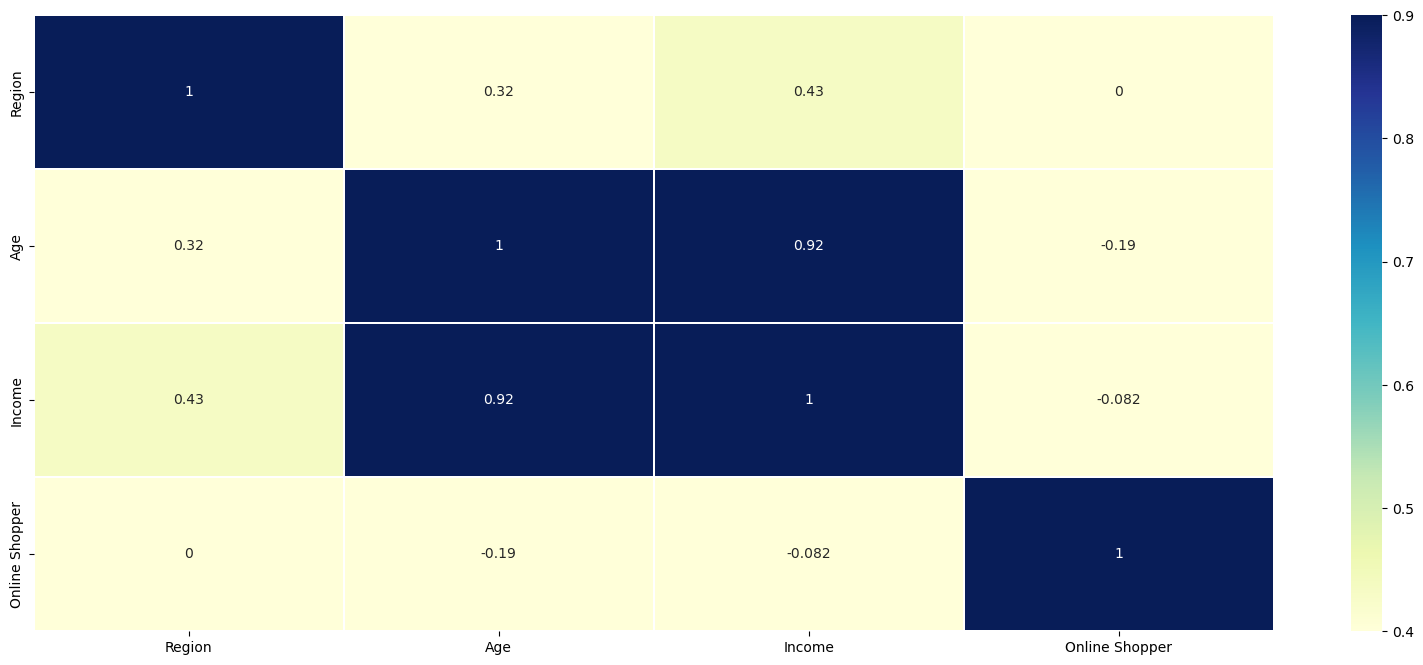

In [30]:
corrmatrix =data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')

In [31]:
data.columns

Index(['Region', 'Age', 'Income', 'Online Shopper'], dtype='object')